# BatFlightVisualization3D-compare-static


## Paquetes

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm, colors

from BatFlightAnalysis import read_data, split_data, animate_flower_bat

## Código

C:\Users\matea\AppData\Local\Temp/ipykernel_6748/3469598285.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap("viridis", num_trayectorias)


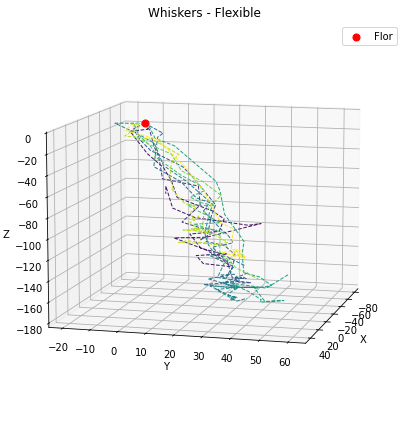

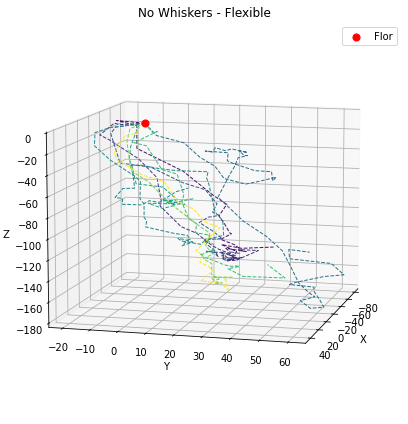

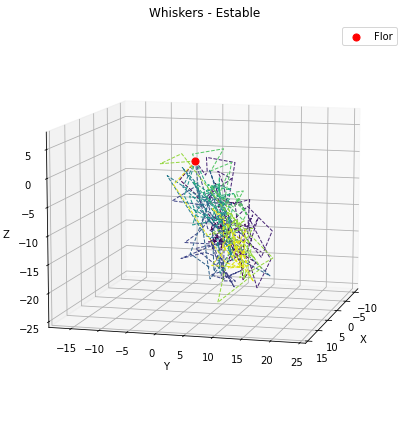

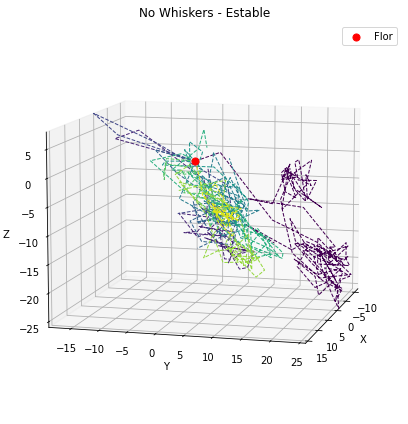

In [3]:
def plot_flower_bat_static(individuo, bounding_box_estable=None, bounding_box_flexible=None, view_angle=None):
    # Configuración de títulos y etiquetas para cada gráfico separado
    configurations = [
        ("Whiskers", "Flexible"),
        ("No Whiskers", "Flexible"),
        ("Whiskers", "Estable"),
        ("No Whiskers", "Estable")
    ]

    num_trayectorias = 20
    colormap = cm.get_cmap("viridis", num_trayectorias)
    colores = [colormap(i / (num_trayectorias - 1)) for i in range(num_trayectorias)]

    # Variables para calcular bounding boxes si no se proporcionan
    if bounding_box_flexible is None:
        x_min_flex, x_max_flex = float('inf'), float('-inf')
        y_min_flex, y_max_flex = float('inf'), float('-inf')
        z_min_flex, z_max_flex = float('inf'), float('-inf')

    if bounding_box_estable is None:
        x_min_est, x_max_est = float('inf'), float('-inf')
        y_min_est, y_max_est = float('inf'), float('-inf')
        z_min_est, z_max_est = float('inf'), float('-inf')

    # Primera pasada: obtener valores extremos para cada tipo
    for whiskers, pedicelo in configurations:
        inicio = {'Flexible': 2, 'Estable': 1}[pedicelo]

        for i in range(inicio, num_trayectorias + 1, 2):
            data_bef, data_fee, data_aft = read_data(f'data/Individuo {individuo}/{whiskers}/output_points_{i}.xlsx')
            flower_bef, flower_fee, flower_aft, bat_bef, bat_fee, bat_aft = split_data(data_bef, data_fee, data_aft)
            df = flower_fee.copy()

            df['x'] -= df['x'].iloc[0]
            df['y'] -= df['y'].iloc[0]
            df['z'] -= df['z'].iloc[0]

            if pedicelo == "Flexible" and bounding_box_flexible is None:
                x_min_flex, x_max_flex = min(x_min_flex, df['x'].min()), max(x_max_flex, df['x'].max())
                y_min_flex, y_max_flex = min(y_min_flex, df['y'].min()), max(y_max_flex, df['y'].max())
                z_min_flex, z_max_flex = min(z_min_flex, df['z'].min()), max(z_max_flex, df['z'].max())

            if pedicelo == "Estable" and bounding_box_estable is None:
                x_min_est, x_max_est = min(x_min_est, df['x'].min()), max(x_max_est, df['x'].max())
                y_min_est, y_max_est = min(y_min_est, df['y'].min()), max(y_max_est, df['y'].max())
                z_min_est, z_max_est = min(z_min_est, df['z'].min()), max(z_max_est, df['z'].max())

    # Asignar valores calculados si no fueron proporcionados
    if bounding_box_flexible is None:
        bounding_box_flexible = ((x_min_flex, x_max_flex), (y_min_flex, y_max_flex), (z_min_flex, z_max_flex))

    if bounding_box_estable is None:
        bounding_box_estable = ((x_min_est, x_max_est), (y_min_est, y_max_est), (z_min_est, z_max_est))

    # Segunda pasada: graficar con bounding boxes diferenciados
    for whiskers, pedicelo in configurations:
        fig = plt.figure(figsize=(6, 6))
        ax = fig.add_subplot(111, projection='3d')

        inicio = {'Flexible': 2, 'Estable': 1}[pedicelo]

        # Definir bounding box según el tipo
        if pedicelo == "Flexible":
            x_min, x_max = bounding_box_flexible[0]
            y_min, y_max = bounding_box_flexible[1]
            z_min, z_max = bounding_box_flexible[2]
        else:
            x_min, x_max = bounding_box_estable[0]
            y_min, y_max = bounding_box_estable[1]
            z_min, z_max = bounding_box_estable[2]

        # Punto de referencia para la flor
        ax.scatter(0, 0, 0, color='red', s=50, label="Flor", marker='o')

        for i in range(inicio, num_trayectorias + 1, 2):
            data_bef, data_fee, data_aft = read_data(f'data/Individuo {individuo}/{whiskers}/output_points_{i}.xlsx')
            flower_bef, flower_fee, flower_aft, bat_bef, bat_fee, bat_aft = split_data(data_bef, data_fee, data_aft)
            df = flower_fee.copy()

            df['x'] -= df['x'].iloc[0]
            df['y'] -= df['y'].iloc[0]
            df['z'] -= df['z'].iloc[0]

            ax.plot(df['x'], df['y'], df['z'], color=colores[i - 1], linestyle='dashed', linewidth=1)

        # Aplicar bounding box correspondiente
        ax.set_xlim([x_min, x_max])
        ax.set_ylim([y_min, y_max])
        ax.set_zlim([z_min, z_max])

        # Aplicar ángulo de visión uniforme si se especifica
        if view_angle:
            ax.view_init(elev=view_angle[0], azim=view_angle[1])

        # Configurar la vista
        ax.set_title(f"{whiskers} - {pedicelo}")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        ax.legend()

        plt.tight_layout()
        plt.show()

# Ejemplo sin especificar bounding boxes (se calculan automáticamente)
plot_flower_bat_static(individuo=7, view_angle=(10, 15))